In [1]:
# Importation des bibliothèques utilisées pour cet exemple
import matplotlib.pyplot as plt
import numpy as np
import imageio
import skimage

Profitons du fais que l'oeil humain a généralement moins de sensibilité à la couleur bleue pour créer une image mystère contenant une photo de chaton.

In [2]:
# Lecture d'un ficher image (utilisé l'image 1)
# Utilisez imageio.imread
img1 = imageio.imread('image_00.jpg')

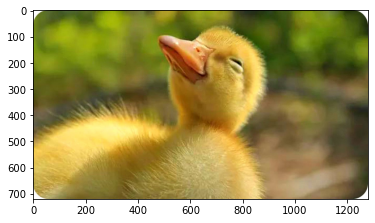

In [3]:
# Affichage d'une image : Utilisez matplotlib (plt.imshow() et plt.show())
plt.imshow(img1)
plt.show()

In [4]:
# Affichage de quelques informations au sujet de l'image (utilisez les attributes de la classe ndarray à laquelle appartient la variable img1)
print(img1.shape, img1.dtype)
print(img1[100,100])
print(img1[100][100])

(720, 1280, 3) uint8
[164 176  14]
[164 176  14]


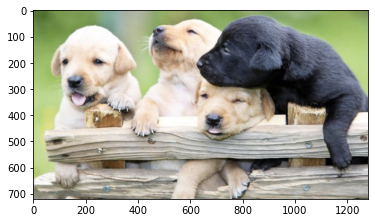

(720, 1280, 3) uint8


In [5]:
# Répéter pour les deux autres images
img2 = imageio.imread('image_01.jpg')
plt.imshow(img2)
plt.show()
print(img2.shape, img2.dtype)

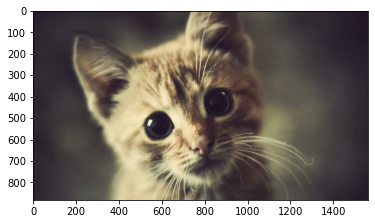

(882, 1563, 3) uint8


In [6]:
img3 = imageio.imread('image_02.jpg')
plt.imshow(img3)
plt.show()
print(img3.shape, img3.dtype)

In [7]:
# Calculer la dimension minimale parmi les 3 images en X et en Y (utiliser la méthode .shape, et la fonction min)
xdim = min(img1.shape[0], img2.shape[0], img3.shape[0])
print("min X:", xdim)
ydim = min(img1.shape[1], img2.shape[1], img3.shape[1])
print("min Y:", ydim)

min X: 720
min Y: 1280


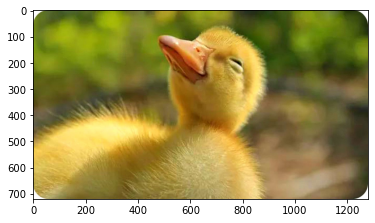

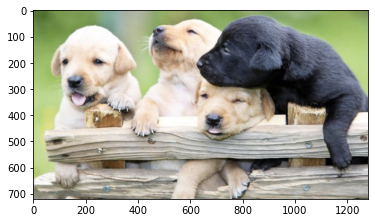

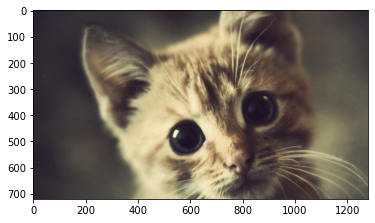

In [8]:
# Rogner les images selon la dimension calculée plus haut
imr1 = img1[0:720, 0:1280]
plt.imshow(imr1)
plt.show()
imr2 = img2[:720, :1280]
plt.imshow(imr2)
plt.show()
imr3 = img3[50:770, :1280]
plt.imshow(imr3)
plt.show()

In [9]:
# Convertir les images RGB en niveau de gris (moyenner tous les canaux). Utiliser la méthode .mean et le bon axe
im1 = np.mean(imr1, axis=2)
im2 = np.mean(imr2, axis=2)
im3 = np.mean(imr3, axis=2)

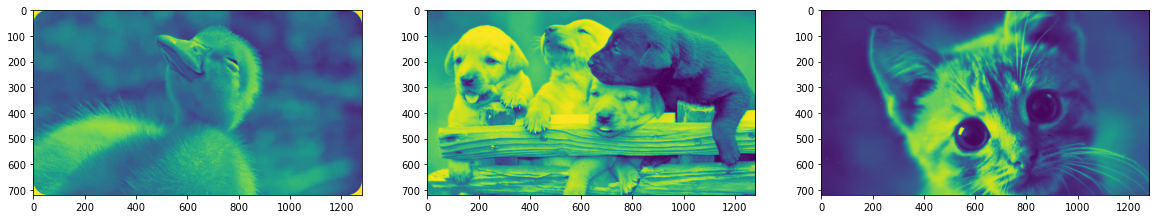

In [11]:
# Afficher les trois images dans une meme figure
# Note : utilisez plt.subplot
#plt.figure(figsize=(20,4))
f, axarr = plt.subplots(1,3, figsize=(20,5))
axarr[0].imshow(im1)
axarr[1].imshow(im2)
axarr[2].imshow(im3)
plt.show()

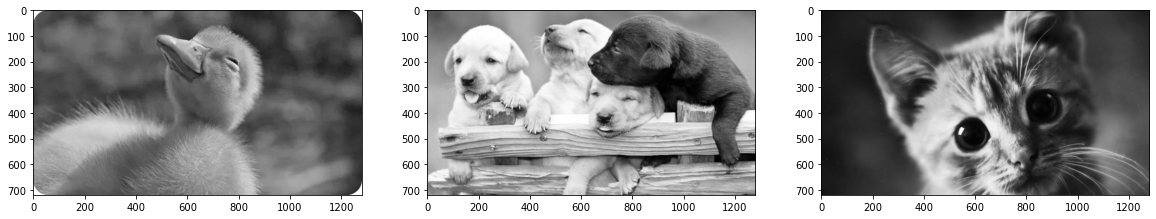

In [13]:
# Affichez les images en niveaux de gris (utilisez l'argument cmap='gray')
#plt.figure(figsize=(20,5))
f, axarr = plt.subplots(1,3, figsize=(20,5))
axarr[0].imshow(im1, cmap='gray')
axarr[1].imshow(im2, cmap='gray')
axarr[2].imshow(im3, cmap='gray')
plt.show()

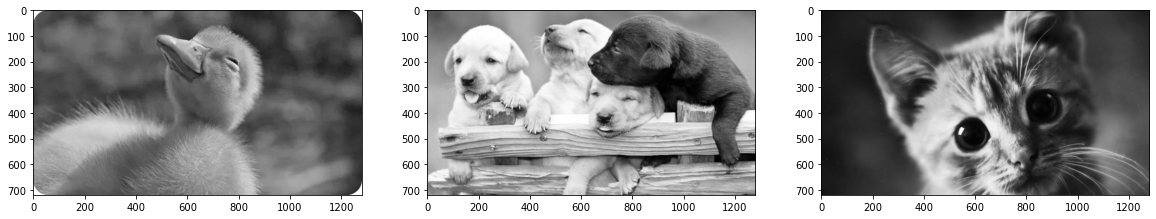

In [14]:
# Noramliser les intensités entre 0 et 1 pour les images 1 et 2, et entre 0 et 0.2 pour l'image 3.
# Utiliser: np.max
im1 = im1 / im1.max()
im2 = im2 / im2.max()
im3 = im3 * 0.2 / im3.max()

f, axarr = plt.subplots(1,3, figsize=(20,5))
axarr[0].imshow(im1, cmap='gray')
axarr[1].imshow(im2, cmap='gray')
axarr[2].imshow(im3, cmap='gray')
plt.show()

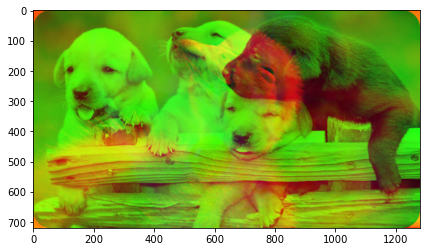

In [17]:
# Combiner les images (utilisé np.stack(..., axis=2)) pour créer 
montage = np.stack((im1, im2, im3), axis=2)

plt.figure(figsize=(20,4))
plt.imshow(montage)
plt.show()

<Figure size 1080x360 with 0 Axes>

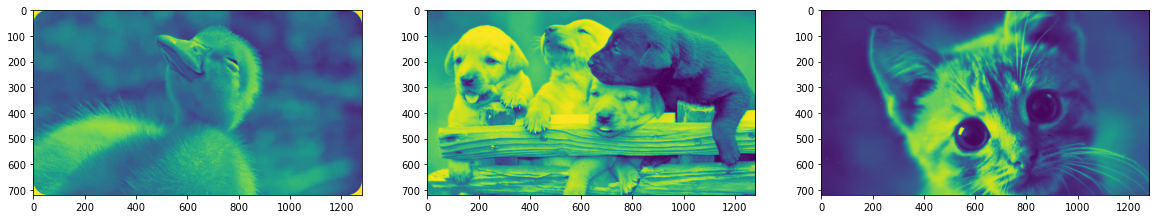

In [19]:
# Afficher les 3 canaux couleurs (indexation de l'axe 2)
plt.figure(figsize=(15,5))

f, axarr = plt.subplots(1,3, figsize=(20,5))
axarr[0].imshow(montage[:,:,0])
axarr[1].imshow(montage[:,:,1])
axarr[2].imshow(montage[:,:,2])
plt.show()

In [25]:
# Entregistrer l'image mytère sur disque sous format jpg
'''
plt.imshow(montage)
plt.savefig('saved_figure.jpg')
'''
imageio.imsave('saved_figure.jpg', montage)
print(montage.dtype)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


float64


In [27]:
# Modifier le format des pixels de l'image ne plus recevoir l'avertissement précédent. 
# * Utiliser la méthode .astype() de la classe ndarray, et le format de donnée np.uint8.
# N'oublier pas d'ajuster l'étendue des valeurs pour éviter la saturation de votre image.
montage_8bit = (montage * 255 / montage.max()).astype(np.uint8)

# Enregistrer cette image sous un autre nom
imageio.imsave('saved_figure_8bit.jpg', montage_8bit)

# Suggestion de modification
* Au lieu de rogner les images, utiliser les fonctions disponibles dans le module `skimage.transform` pour redimensionner les images avant de les combiner
